In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobiles-dataset-2025/Mobiles Dataset (2025).csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

In [4]:
df=pd.read_csv("/kaggle/input/mobiles-dataset-2025/Mobiles Dataset (2025).csv", encoding='latin1')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


In [6]:
df.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

In [8]:
df['Company Name'].unique()

array(['Apple', 'Samsung', 'OnePlus', 'Vivo', 'iQOO', 'Oppo', 'Realme',
       'Xiaomi', 'Lenovo', 'Motorola', 'Huawei', 'Nokia', 'Sony',
       'Google', 'Tecno', 'Infinix', 'Honor', 'POCO', 'Poco'],
      dtype=object)

In [9]:
df['Model Name'].unique()

array(['iPhone 16 128GB', 'iPhone 16 256GB', 'iPhone 16 512GB',
       'iPhone 16 Plus 128GB', 'iPhone 16 Plus 256GB',
       'iPhone 16 Plus 512GB', 'iPhone 16 Pro 128GB',
       'iPhone 16 Pro 256GB', 'iPhone 16 Pro 512GB',
       'iPhone 16 Pro Max 128GB', 'iPhone 16 Pro Max 256GB',
       'iPhone 16 Pro Max 512GB', 'iPhone 15 128GB', 'iPhone 15 256GB',
       'iPhone 15 512GB', 'iPhone 15 Plus 128GB', 'iPhone 15 Plus 256GB',
       'iPhone 15 Plus 512GB', 'iPhone 15 Pro 128GB',
       'iPhone 15 Pro 256GB', 'iPhone 15 Pro 512GB',
       'iPhone 15 Pro Max 128GB', 'iPhone 15 Pro Max 256GB',
       'iPhone 15 Pro Max 512GB', 'iPhone 14 128GB', 'iPhone 14 256GB',
       'iPhone 14 512GB', 'iPhone 14 Plus 128GB', 'iPhone 14 Plus 256GB',
       'iPhone 14 Plus 512GB', 'iPhone 14 Pro 128GB',
       'iPhone 14 Pro 256GB', 'iPhone 14 Pro 512GB',
       'iPhone 14 Pro Max 128GB', 'iPhone 14 Pro Max 256GB',
       'iPhone 14 Pro Max 512GB', 'iPhone 13 mini 128GB',
       'iPhone 13 mini 256G

In [10]:
df.isna().sum()

Company Name                 0
Model Name                   0
Mobile Weight                0
RAM                          0
Front Camera                 0
Back Camera                  0
Processor                    0
Battery Capacity             0
Screen Size                  0
Launched Price (Pakistan)    0
Launched Price (India)       0
Launched Price (China)       0
Launched Price (USA)         0
Launched Price (Dubai)       0
Launched Year                0
dtype: int64

In [11]:
df.describe()

,Launched Year
count,930.000000
mean,2022.193548
std,1.862080
min,2014.000000
25%,2021.000000
50%,2023.000000
75%,2024.000000
max,2025.000000


**2.1 Count of phones by company**

As you can see the mojority of phone have some version depends on value of memory (128GB, 256GB, 512GB, 1TB). So, if we just group by company name and count we count one phone some times (for example, iphone 16 128GB, iphone 16 256GB and iphone 16 512GB are the same phone.

the solution is delete on this step information about memory storage and then aggregate count of phone.

In [12]:
df_uniq_phone=df.copy()

pattern=r'\b\w*(GB|TB)\w*\b'
results=[]

for phone in df['Model Name']:
    result=re.sub(pattern,'',phone)
    result=' '.join(result.split())
    results.append(result)

df_uniq_phone['Uniq Model Name']= results

In [13]:
df_uniq_phone['Uniq Model Name']

0           iPhone 16
1           iPhone 16
2           iPhone 16
3      iPhone 16 Plus
4      iPhone 16 Plus
            ...      
925            Pad 5G
926            Pad 5G
927    Galaxy Z Fold6
928    Galaxy Z Fold6
929    Galaxy Z Fold6
Name: Uniq Model Name, Length: 930, dtype: object

In [14]:
count_by_name=df_uniq_phone.groupby('Company Name')['Uniq Model Name'].nunique().sort_values(ascending=False)

In [15]:
count_by_name

Company Name
Honor       91
Oppo        78
Samsung     57
Infinix     55
Vivo        55
OnePlus     53
Huawei      39
Tecno       39
Realme      37
Motorola    36
Apple       33
POCO        30
Google      21
Xiaomi      12
Lenovo      10
Sony         9
Nokia        7
iQOO         3
Poco         1
Name: Uniq Model Name, dtype: int64

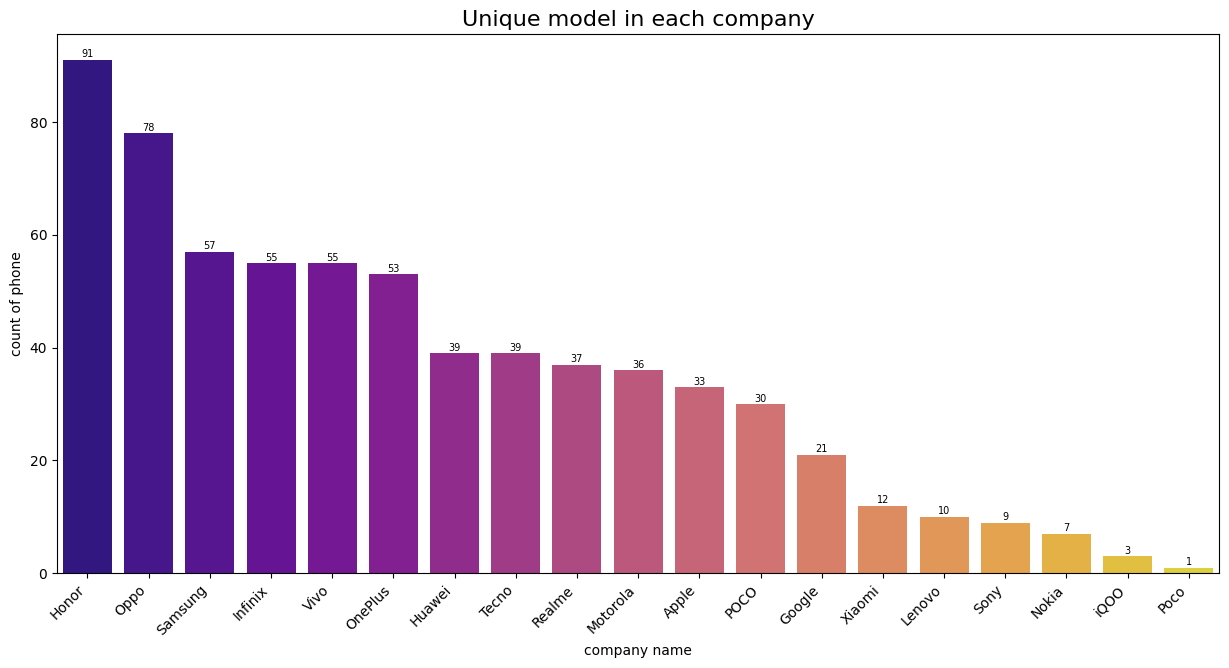

In [16]:
count_by_name = df_uniq_phone.groupby('Company Name')['Uniq Model Name'].nunique().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (15,7))
ax = sns.barplot(x = count_by_name.index, y = count_by_name, orient = 'v', palette = 'plasma')
ax.set(ylabel="count of phone",
       xlabel="company name")
ax.set_title('Unique model in each company', fontsize=16)
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(count_by_name):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=7)

# 2.2 Count phones by years

In [17]:
count_by_year=df_uniq_phone.groupby(['Launched Year','Company Name'])['Uniq Model Name'].nunique()
count_by_year

Launched Year  Company Name
2014           Vivo             2
2016           Samsung          4
               Vivo             1
2017           Apple            1
               OnePlus          2
                               ..
2024           Xiaomi          10
               iQOO             2
2025           Oppo             4
               POCO             2
               Realme           3
Name: Uniq Model Name, Length: 92, dtype: int64

In [18]:
count_by_year.head(20)

Launched Year  Company Name
2014           Vivo            2
2016           Samsung         4
               Vivo            1
2017           Apple           1
               OnePlus         2
               Samsung         2
               Vivo            3
2018           Apple           3
               Lenovo          1
               OnePlus         2
               Samsung         3
               Vivo            5
2019           Apple           4
               Google          4
               Lenovo          4
               OnePlus         2
               Oppo            2
               Samsung         2
               Vivo            8
2020           Apple           9
Name: Uniq Model Name, dtype: int64

In [19]:
count_by_year = count_by_year.unstack()
count_by_year

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Company Name,Apple,Google,Honor,Huawei,Infinix,Lenovo,Motorola,Nokia,OnePlus,Oppo,POCO,Poco,Realme,Samsung,Sony,Tecno,Vivo,Xiaomi,iQOO
Launched Year,,,,,,,,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN,NaN
2017,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN
2018,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,5.0,NaN,NaN
2019,4.0,4.0,NaN,NaN,NaN,4.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,8.0,NaN,NaN
2020,9.0,3.0,12.0,NaN,8.0,NaN,NaN,NaN,13.0,12.0,4.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN
2021,4.0,3.0,20.0,7.0,7.0,3.0,NaN,1.0,8.0,11.0,6.0,NaN,1.0,2.0,NaN,NaN,7.0,NaN,NaN
2022,4.0,3.0,17.0,7.0,9.0,2.0,12.0,3.0,7.0,13.0,6.0,NaN,3.0,13.0,3.0,NaN,6.0,NaN,NaN
2023,4.0,3.0,24.0,10.0,11.0,NaN,4.0,3.0,14.0,13.0,6.0,NaN,5.0,21.0,3.0,NaN,8.0,2.0,1.0


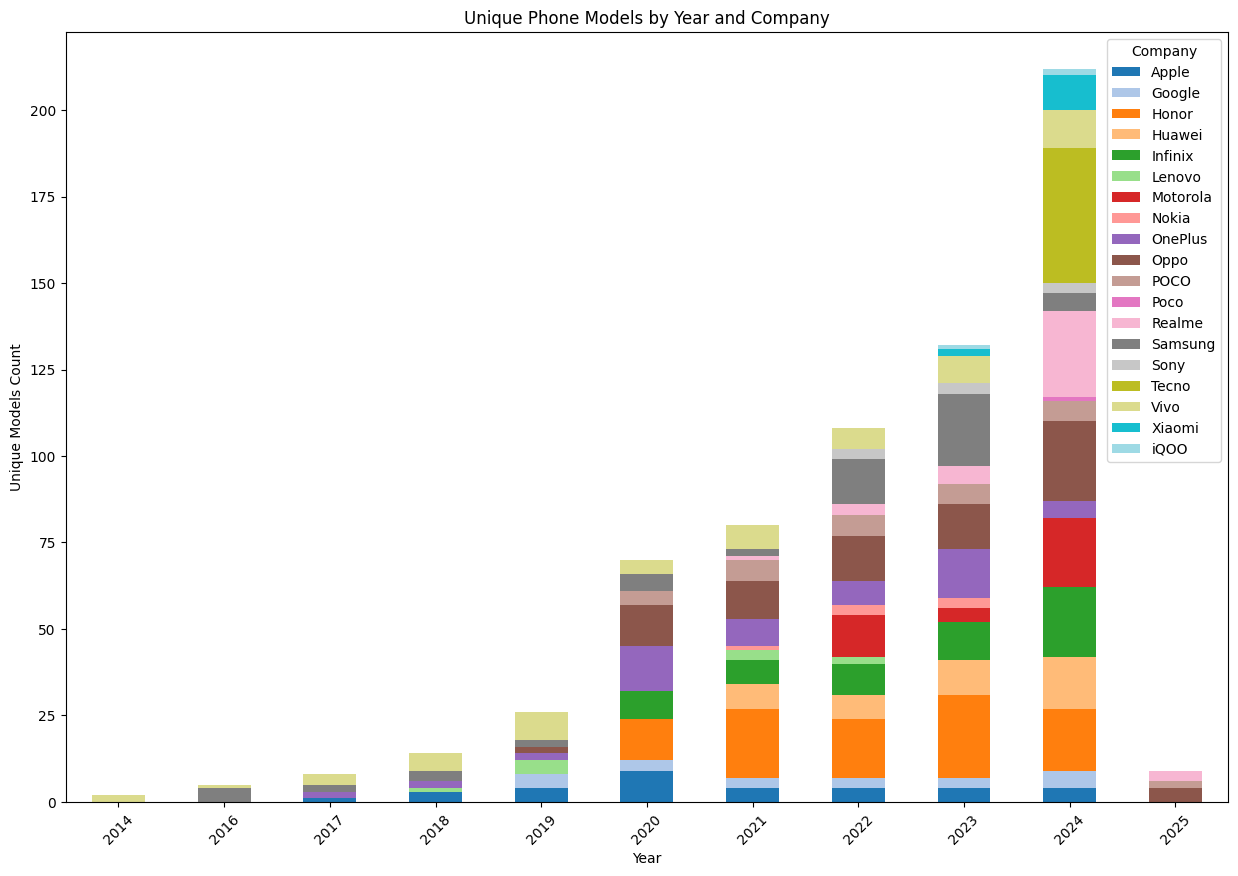

In [20]:
count_by_year = df_uniq_phone.groupby(['Launched Year', 'Company Name'])['Uniq Model Name'].nunique()
count_by_year
count_by_year = count_by_year.unstack()

fig, ax = plt.subplots(figsize = (15,10))
count_by_year.plot(kind="bar", stacked=True, colormap="tab20", ax=ax)

plt.xlabel("Year")
plt.ylabel("Unique Models Count")
plt.title("Unique Phone Models by Year and Company")
plt.legend(title="Company")
plt.xticks(rotation=45)
plt.show()

# 2.3 price spread among brands

In [21]:
df['Launched Price (USA)']=df['Launched Price (USA)'].astype(str).str.replace('USD','',regex=False).str.replace(',','',regex=False).astype(float)
df['Launched Price (USA)']

0       799.0
1       849.0
2       899.0
3       899.0
4       949.0
        ...  
925     280.0
926     300.0
927    1899.0
928    1719.0
929    2259.0
Name: Launched Price (USA), Length: 930, dtype: float64

In [22]:
df['Mobile Weight']=df['Mobile Weight'].astype(str).str.replace('g','',regex=False).str.replace(',','',regex=False).astype(float)
df['Mobile Weight']

0      174.0
1      174.0
2      174.0
3      203.0
4      203.0
       ...  
925    571.0
926    571.0
927    239.0
928    239.0
929    239.0
Name: Mobile Weight, Length: 930, dtype: float64

In [25]:
df['RAM'] = df['RAM'].astype(str).str.replace('GB', '', regex=False).replace(',', '', regex=False).str.replace('8 / 12', '8').astype(float)

In [28]:
df['Battery Capacity']=df['Battery Capacity'].astype(str).str.replace('mAh','', regex=False).str.replace(',','',regex=False).astype(float)

In [29]:
df['Screen Size'] = df['Screen Size'].astype(str).str.replace(r'(\d+(\.\d+)?)\s*inches.*', r'\1', regex=True).str.replace(',', '', regex=False).astype(float)

In [30]:
df=df[df['Launched Price (USA)']!=39622]

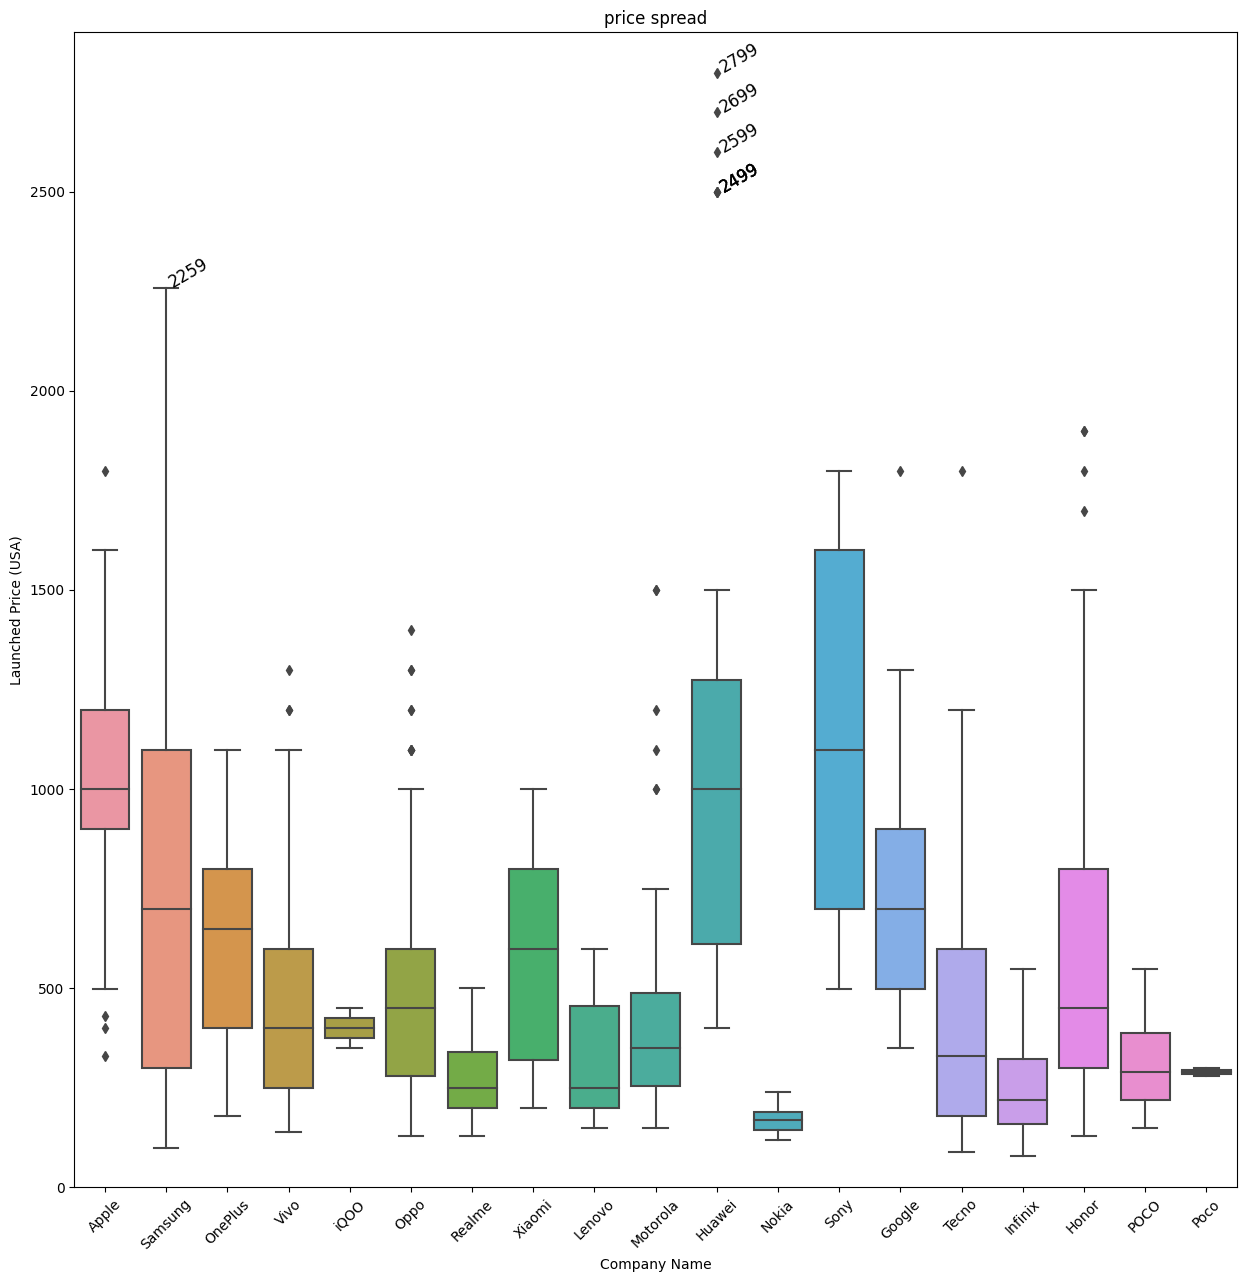

In [33]:
plt.subplots(figsize = (15,15))
sns.boxplot(x="Company Name", y="Launched Price (USA)", data=df)

plt.title("price spread")
plt.xticks(rotation=45)
plt.ylim(0, 2900)

outliers = df[(df['Launched Price (USA)'] > 2000) & (df['Launched Price (USA)'] < 2900)]
xticks = {cat: idx for idx, cat in enumerate(df['Company Name'].unique())}

for i, row in outliers.iterrows():
    x_pos = xticks[row['Company Name']]  # Получаем числовую позицию категории
    plt.text(x_pos, row['Launched Price (USA)'], f"{row['Launched Price (USA)']:.0f}", 
             color='black', ha='left', fontsize=12, rotation=30)

plt.show()

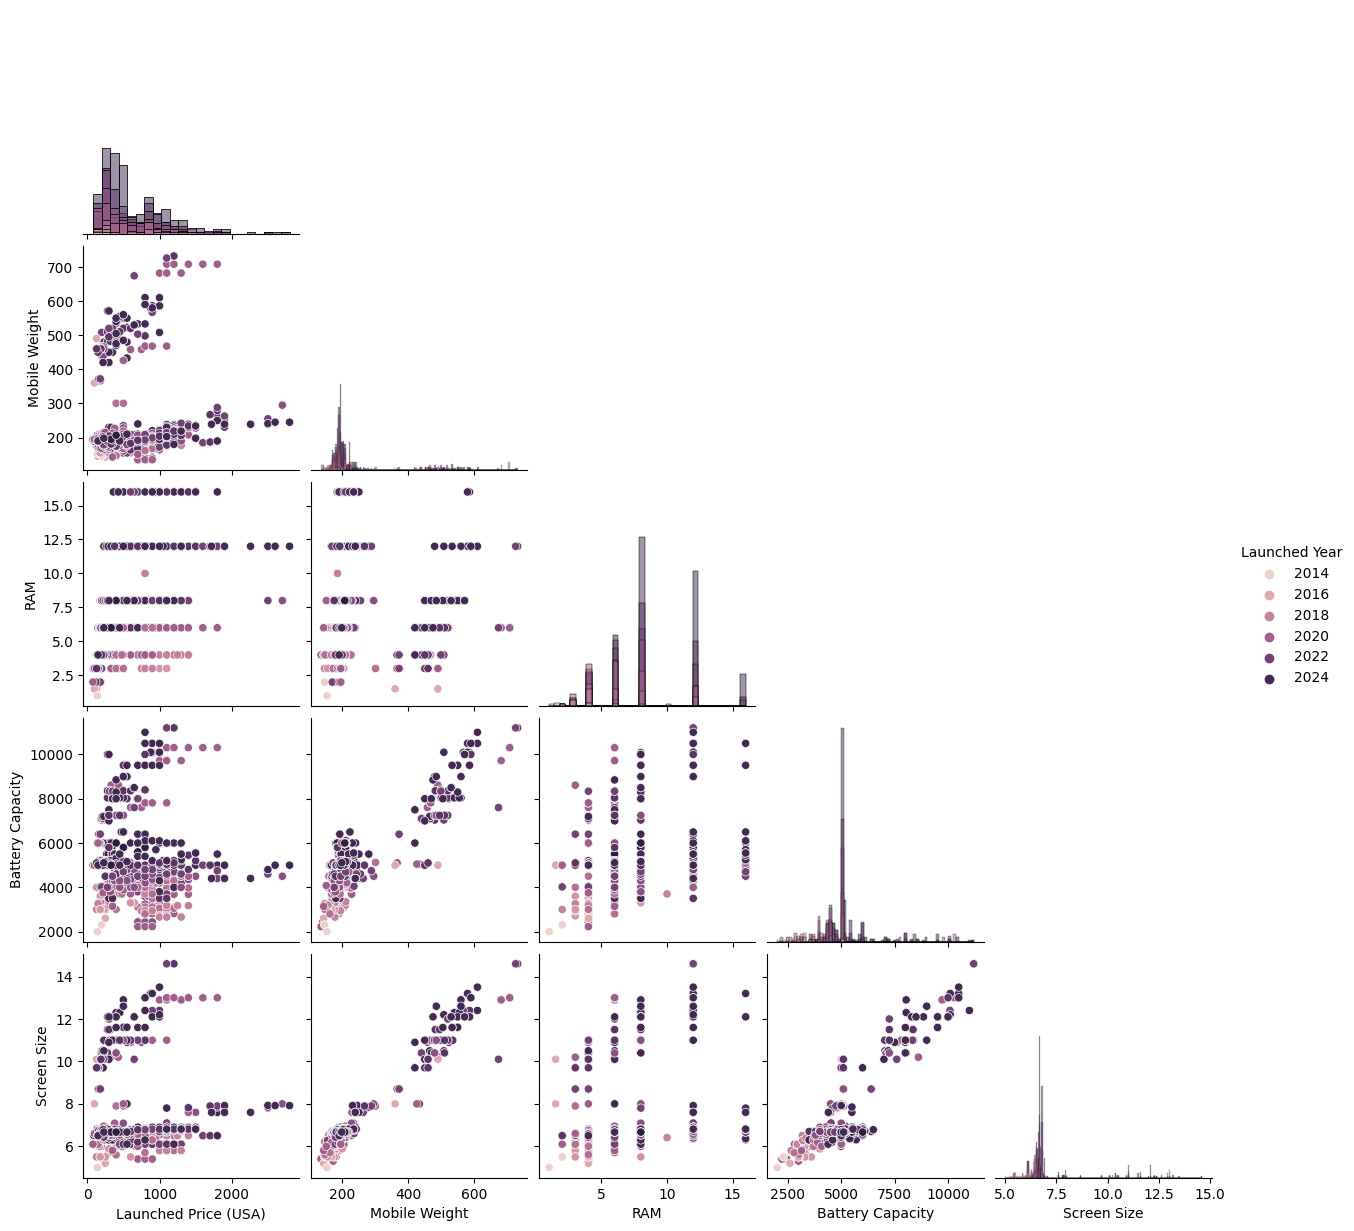

In [34]:
sns.pairplot(df[['Launched Price (USA)', 'Mobile Weight', 'RAM', 'Battery Capacity', 'Screen Size', 'Launched Year']], diag_kind="hist", corner=True, hue='Launched Year')

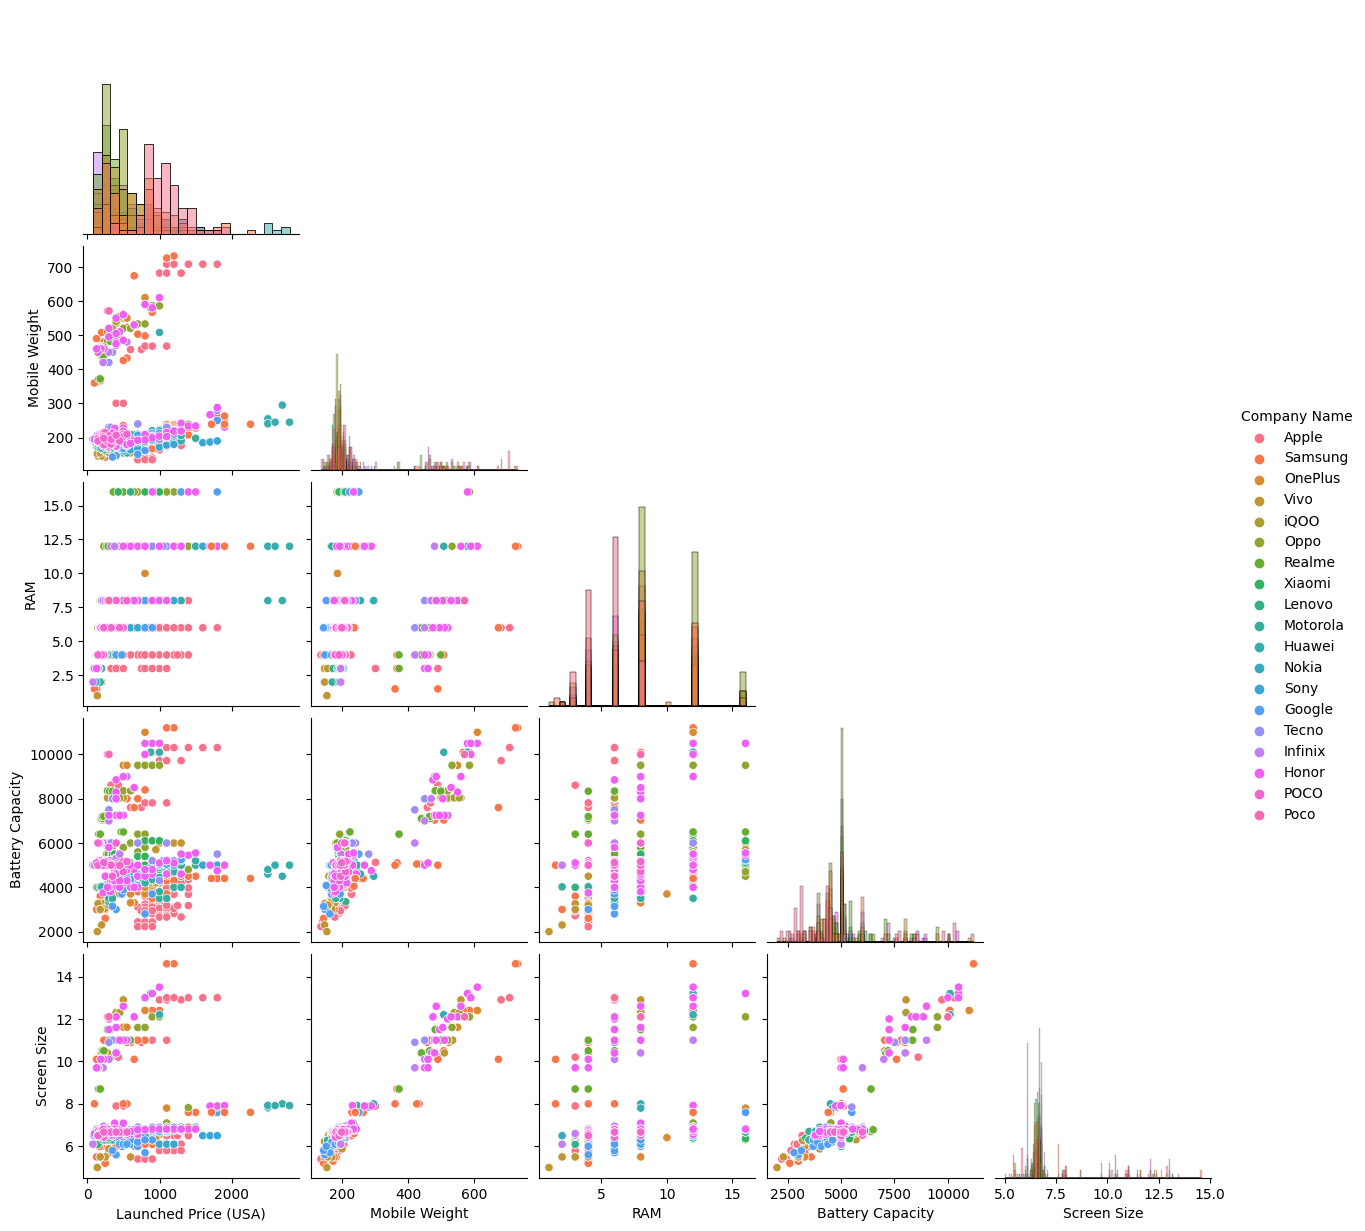

In [35]:
sns.pairplot(df[['Launched Price (USA)', 'Mobile Weight', 'RAM', 'Battery Capacity', 'Screen Size', 'Company Name']], diag_kind="hist", corner=True, hue='Company Name')

# 2.5 Trend of price over years

Text(0.5, 1.0, 'Average trend of price\n ------------------------------------------------------->')

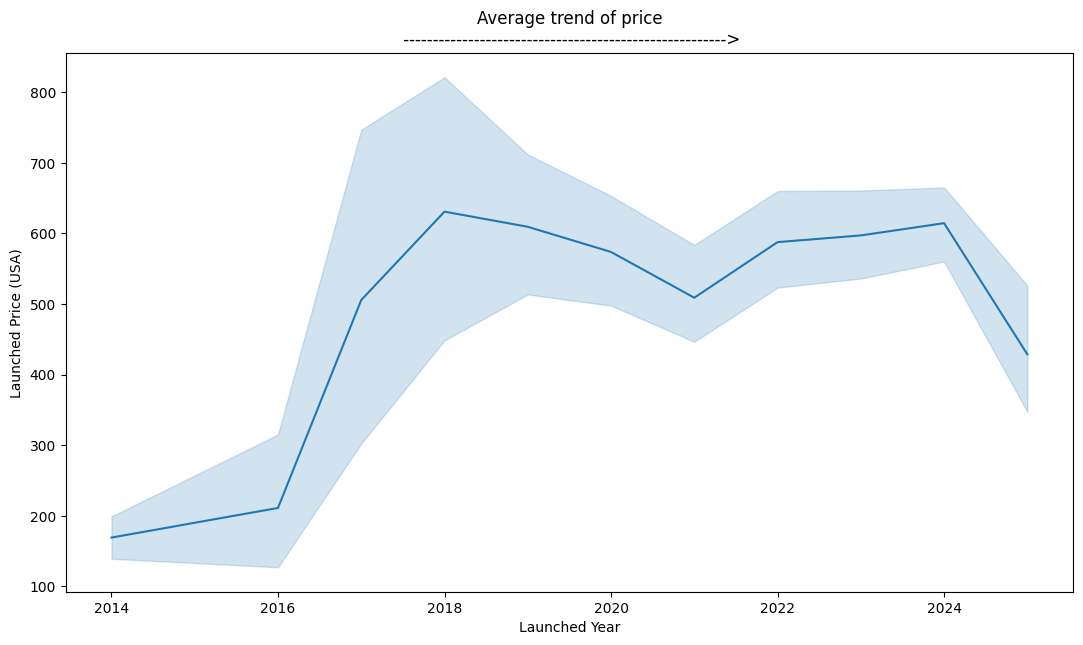

In [36]:
fig, ax = plt.subplots(figsize = (13,7))
sns.lineplot(x=df['Launched Year'], y=df['Launched Price (USA)'],data=df)
plt.title("Average trend of price\n ------------------------------------------------------->")

<Axes: >

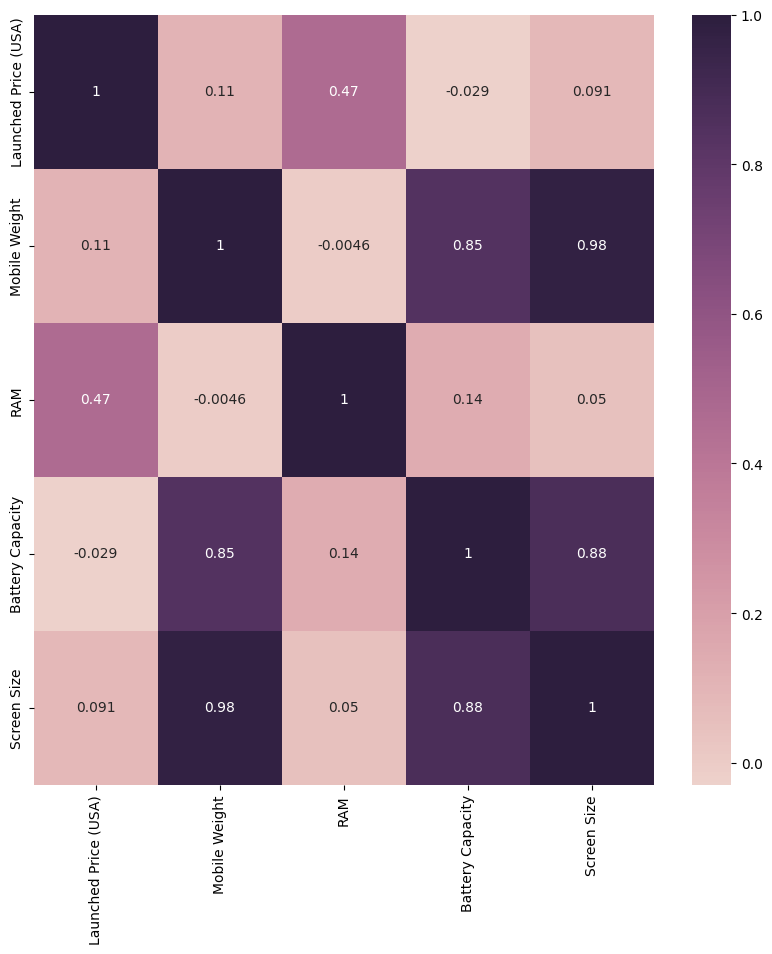

In [37]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df[['Launched Price (USA)', 'Mobile Weight', 'RAM', 'Battery Capacity', 'Screen Size']].corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))